# Overview

This file explores attempts to build a classifier by looking at the syntax tags, rather than specific words. 

In [1]:
from ClassifierFunctions import *

import os

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
data_dir = 'SavedData'

In [3]:
data = pickle.load(open(os.path.join(data_dir, 'processed_data.pkl'), 'rb'))
features_dict = pickle.load(open(os.path.join(data_dir, 'features_dict.pkl'), 'rb'))

In [15]:
# Using a pipeline so I can add more preprocessing later
param_grid = {'vect__ngram_range': [(1,1), (1,2), (1, 3)]}

pipeline = [('vect', TfidfVectorizer(encoding='unicode')),
            ('clf', MultinomialNB())]
model = Pipeline(pipeline)


SCORES:

Average Accuracy: 0.662269309638
Average Precision:  0.638843742415
Average Recall: 0.98
Average F1:  0.773236774452

Pipeline Parameters:
{'vect__ngram_range': (1, 2)}



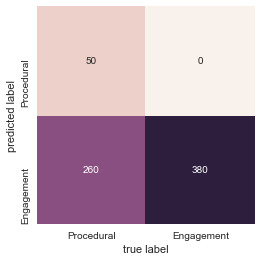

In [16]:
X, y = data['syn_tags'], data.binary_label

grid = evaluate_model(model, param_grid, X, y)
clf_tags = grid.best_estimator_

Yikes, this performs worse than all of my word based classifiers. I suspect that given more exploration this could be effective. However, plain Naive Bayes on a simple bag of words approach is effective enough that it feels unecessary. 